In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
t=np.loadtxt('halosprop.dat')

In [95]:
np.max(t[:,7])

113363.0

In [109]:
cut, = np.where(t[:,7]>50000)
cut

array([36796, 51991, 52085, 52091, 52092])

In [112]:
t[cut,9]

array([36792., 51997., 52080., 52086., 52087.])

In [113]:
t[cut,7]

array([ 63051.,  73282., 113363.,  96060.,  90179.])

In [120]:
s = np.loadtxt('galaxy_st.dat')
g = np.loadtxt('galaxy_gs.dat')
m = np.loadtxt('galaxy_dm.dat')

In [159]:
s = np.loadtxt('fort.10')
g = np.loadtxt('fort.11')
m = np.loadtxt('fort.12')

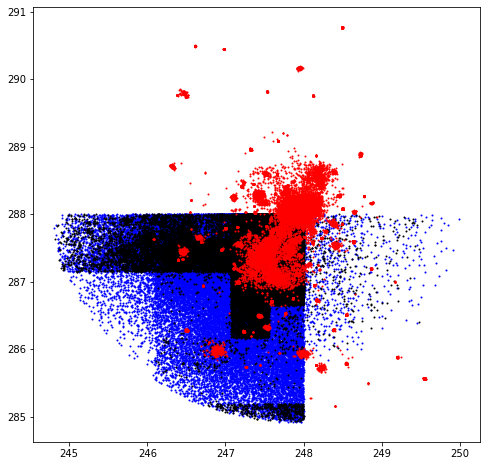

In [158]:
plt.figure(figsize=(8,8))


plt.scatter(g[:,2],g[:,0],s=1,color='blue')
plt.scatter(m[:,2],m[:,0],s=1,color='black')
plt.scatter(s[:,2],s[:,0],s=1,color='red')
#plt.xlim(228.7,229.5)
#plt.ylim(230.5,231.5)

In [146]:
%pylab inline
import pynbody
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sphviewer.tools import QuickView, Blend

Populating the interactive namespace from numpy and matplotlib


In [160]:
pos_dm = m
pos_gs = g
pos_st = s

In [137]:
def get_normalized_image(image):
        image = (image-np.min(image))/(np.max(image)-np.min(image))
        return image

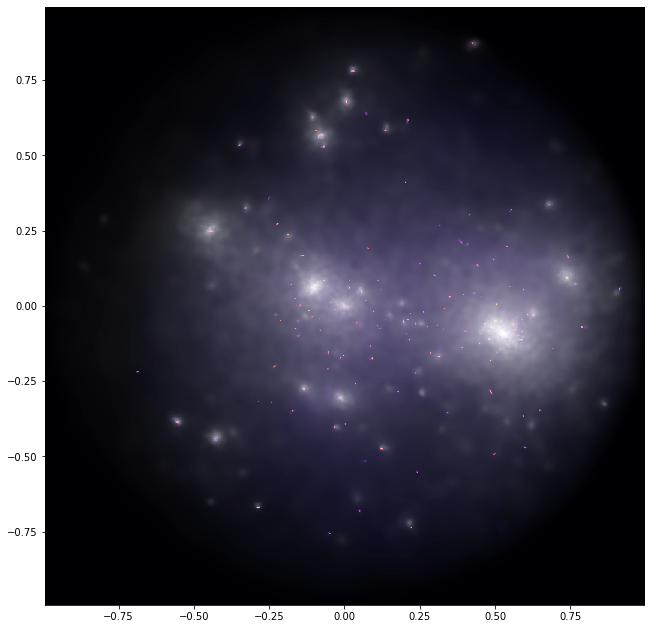

In [164]:
plt.figure(figsize=(11,11))

pos1=pos_dm
pos2=pos_gs
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,xsize=1000,ysize=1000) #,nb=500)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,xsize=1000,ysize=1000)

image1 = cm.Greys_r(get_normalized_image(qv1.get_image()))
image2 = cm.magma(get_normalized_image(qv2.get_image()))

blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

imshow(screen, origin='top', extent=qv1.get_extent())
plt.show()
#plt.savefig(fname='/home/arodriguez/tesis/halo3.png',format='png')

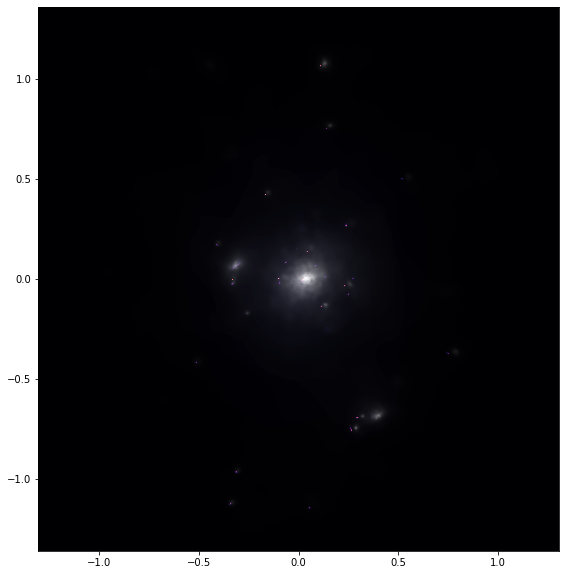

In [54]:
plt.figure(figsize=(10,10))

pos1=pos_dm
pos2=pos_gs
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000) #,nb=500)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000)

image1 = cm.Greys_r(get_normalized_image(qv1.get_image()))
image2 = cm.magma(get_normalized_image(qv2.get_image()))

blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

imshow(screen, origin='lower', extent=qv1.get_extent())
plt.show()